In [1]:
import numpy as np
from graph_matching_p import GM_methods
from graph_matching_p.GM_generative_models.GM_generative_models import Corr_Gaussian,Corr_ER
from graph_matching_p.aux_methods.aux_methods import mismatch_frac
import matplotlib.pyplot as plt

#from graph_matching_p.aux_methods import aux_methods

In [2]:
#We start with an example with correlated Wigner, for different levels of noise 
eta=0.2
size=20
low_rank=3
noise=np.arange(0,1,0.1)# from 0 to 1 steps 0.1
repeat=10 #average over repeat number of times
match_frac_array=np.zeros((4,len(noise)))
for k in range(len(noise)):
    m1=0;m2=0;m3=0;m4=0
    for t in range(repeat):
        A,B,P_rnd=Corr_Gaussian(size,1,noise[k])#generate the two correlated matrices
        #we apply the algorihtms 
        per1=GM_methods.Grampa(A,B,eta).A
        per2=GM_methods.EigenAlign(A,B).A
        per3=GM_methods.Umeyama(A,B).A
        per4=GM_methods.LowRank(A,B,low_rank).A
        m1=m1+(1-mismatch_frac(per1,P_rnd)); m2=m2+(1-mismatch_frac(per2,P_rnd))
        m3=m3+(1-mismatch_frac(per3,P_rnd));m4=m4+(1-mismatch_frac(per4,P_rnd))
    
    match_frac_array[:,k]=(1/repeat)*np.array([m1,m2,m3,m4])


Text(0, 0.5, 'matched fraction')

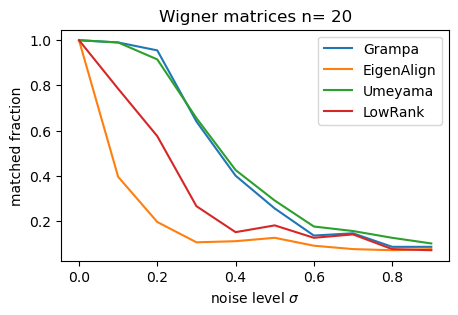

In [3]:
#plot the result...
plt.figure(figsize=(5,3))
plt.plot(noise, match_frac_array.T)
plt.legend(['Grampa','EigenAlign','Umeyama','LowRank'])
plt.title('Wigner matrices n= '+str(size))
plt.xlabel('noise level '+r'$\sigma$')
plt.ylabel('matched fraction')

In [4]:
#Example with correlated Erdös-Rényi graphs
eta=0.2
size=30 #number of nodes of each graph
corr_lev=0.95  #the correlation parameter 's' 
p=0.2 #edge probability in ER graph
A,B,P_rnd=Corr_ER(size,p,corr_lev) #generate the two adj. matrices
#print(A,B)
##true_perm=np.random.permutation(np.arange(len(B[0,:]))) #generate a ground true permutation
#aux=B[:,true_perm] #shuffle rows and columns of matrix B
#B=aux[true_perm,:]
#we apply the algorihtms 
per1=GM_methods.Grampa(A,B,eta).A
per2=GM_methods.EigenAlign(A,B).A
per3=GM_methods.Umeyama(A,B).A
per4=GM_methods.LowRank(A,B,3).A


In [5]:
#print some results
from graph_matching_p.aux_methods.aux_methods import GM_objective_fnct
print('objective fnct value: ', 'Grampa: '+str(GM_objective_fnct(A,B,per1)),
      'EigenAlign: '+str(GM_objective_fnct(A,B,per2)),'Umeyama: '+str(GM_objective_fnct(A,B,per3)),
      'LowRank: '+str(GM_objective_fnct(A,B,per4)),'Ground true perm: '+str(GM_objective_fnct(A,B,P_rnd)),
      sep='\n')
print('-------------------------------------------------------------')
print('mismatch fraction (compared with the ground true permutation): ','Grampa: '+str(mismatch_frac(per1,P_rnd)),
      'EigenAlign: '+ str(mismatch_frac(per2,P_rnd)),'Umeyama: '+str(mismatch_frac(per3,P_rnd)),
      'LowRank: '+str(mismatch_frac(per4,P_rnd)),sep='\n'
     )

objective fnct value: 
Grampa: 54
EigenAlign: 42
Umeyama: 48
LowRank: 53
Ground true perm: 149
-------------------------------------------------------------
mismatch fraction (compared with the ground true permutation): 
Grampa: 0.8333333333333334
EigenAlign: 0.8333333333333334
Umeyama: 0.7666666666666667
LowRank: 1.0


In [7]:
#example with the GMPPM method with initialization inside a Frobenius ball around the ground truth permutation
size=30
noise_lvl=0.1
max_iter=100
A,B,P_rnd=Corr_Gaussian(size,1,noise_lvl)
from graph_matching_p.aux_methods.aux_methods import rnd_permutation_inNeighborhood
initial_point= rnd_permutation_inNeighborhood(size,int(np.floor(size/5)),P_rnd) #define init point
per_ppm=GM_methods.projected_power_method(A,B,initial_point,max_iter)
print(mismatch_frac(per_ppm,P_rnd))

0.0
